#### Customer Churn Prediction (to measure why customers are leaving a business) using ANN and Precision, Recall, F1-Score Evaluation

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Data Loading and Preprocessing
df = pd.read_csv('customer_churn.csv')
df.drop(['customerID'], axis=1, inplace=True) # Dropping irrelevant column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df[df['TotalCharges'].notnull()]
df.replace('No phone service', 'No', inplace=True)

replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in replace_cols:
    df[col].replace({'No internet service': 'No'}, inplace=True)
df.replace({'No': 0, 'Yes': 1}, inplace=True)
df['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

label_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(data=df, columns=label_cols)

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [3]:
# Data Splitting for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.2, random_state=42)

In [4]:
# Model
model = keras.Sequential([
    keras.layers.Dense(21, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4740 - accuracy: 0.7636
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4243 - accuracy: 0.7957
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4167 - accuracy: 0.8037
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4128 - accuracy: 0.8052
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4090 - accuracy: 0.8089
Epoch 6/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4062 - accuracy: 0.8117
Epoch 7/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4051 - accuracy: 0.8096
Epoch 8/100
563/563 [==============================] - 2s 4ms/step - loss: 0.4028 - accuracy: 0.8126
Epoch 9/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4009 - accuracy: 0.8139
Epoch 10/100
563/563 [==============================] - 2s 3ms/step - loss: 0.3998 - accura

In [5]:
model.evaluate(x_test, y_test)
y_pred = (model.predict(x_test) > 0.5).astype("int32")

44/44 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7619


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.56      0.51      0.53       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.69      1407
weighted avg       0.76      0.76      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

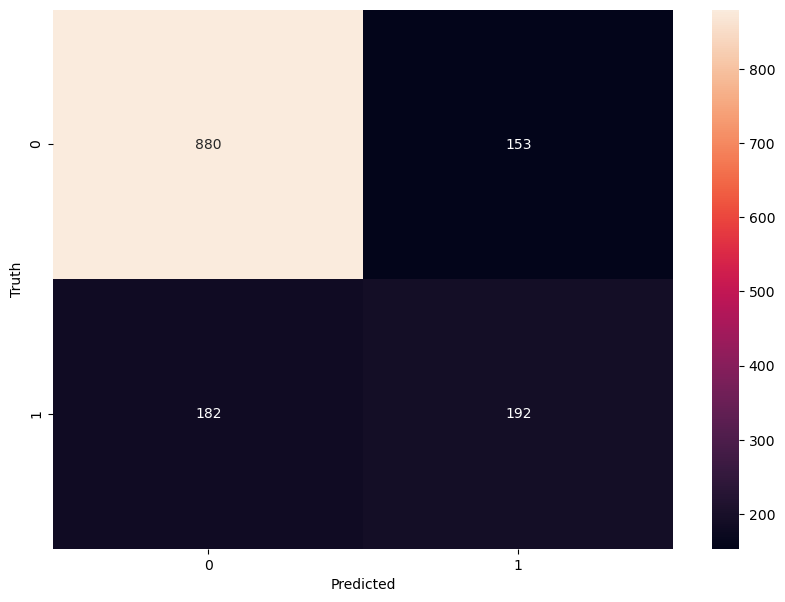

In [6]:
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = tf.math.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [7]:
# Accuracy
accuracy = (880 + 192) / (880 + 192 + 182 + 153)
accuracy

0.7619047619047619

In [9]:
# 0 - Precision
precision_0 = 880 / (880 + 182)
precision_0

0.8286252354048964

In [10]:
# 1 - Precision
precision_1 = 192 / (153 + 192)
precision_1

0.5565217391304348

In [11]:
# 0_Recall
recall_0 = 880 / (880 + 153)
recall_0

0.8518877057115198

In [12]:
# 1_Recall
recall_1 = 192 / (192 + 182)
recall_1

0.5133689839572193

In [13]:
# f1_score_0
f1_score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)
f1_score_0

0.8400954653937949

In [14]:
# f1_score_1
f1_score_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
f1_score_1

0.5340751043115438